In [ ]:
# Install necessary libraries
!pip install matplotlib deap

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

base: This module provides basic functionalities for the DEAP framework, such as defining fitness functions, individuals, and populations.

creator: This module allows the creation of custom types, typically used to define the individuals in evolutionary algorithms.

tools: This module contains various utility functions and operators for working with individuals, populations, and evolutionary algorithms.

algorithms: This module includes implementations of various evolutionary algorithms, such as genetic algorithms (GAs), genetic programming (GP), and other evolutionary strategies.

In [ ]:
# Define the maze
maze = [
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
]

# Start and end points
start, end = (0, 0), (len(maze)-1, len(maze[0])-1)

len(maze) returns the number of rows in the matrix. Subtracting 1 from this value gives us the index of the last row in the matrix because Python indexing starts from 0. So, len(maze)-1 gives us the index of the last row in the matrix.


len(maze[0])-1 calculates the index of the last column in the matrix. maze[0] gives us the first row of the matrix, and len(maze[0]) returns the number of elements (columns) in that row. Subtracting 1 from this value gives us the index of the last column in the matrix.

In [ ]:
# Genetic Algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# weights = -1.0 will basically assign higher fittness to lower distance value.
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_direction", random.choice, ['U', 'D', 'L', 'R'])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_direction, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Creator: This section creates classes to represent the fitness and individuals in our genetic algorithm.

creator.create("FitnessMin", base.Fitness, weights=(-1.0,)): This line creates a class named FitnessMin that inherits from base.Fitness. It represents the fitness of an individual in the population. The weights=(-1.0,) argument indicates that we are minimizing the fitness value. If there were multiple objectives, you would specify multiple weights.
creator.create("Individual", list, fitness=creator.FitnessMin): This line creates a class named Individual that inherits from the Python built-in list type. It represents an individual in the population. Each individual in the population will be a list of directions ('U', 'D', 'L', 'R') in this case. The fitness=creator.FitnessMin argument links the fitness attribute to the FitnessMin class we defined earlier.
Toolbox: This section creates a toolbox that will be used to register functions that are used in the genetic algorithm.

toolbox = base.Toolbox(): This line creates a toolbox instance.
toolbox.register("attr_direction", random.choice, ['U', 'D', 'L', 'R']): This line registers a function named attr_direction in the toolbox. This function randomly selects one direction ('U', 'D', 'L', 'R') as an attribute for an individual.
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_direction, n=100): This line registers a function named individual in the toolbox. This function initializes an individual by repeatedly calling the attr_direction function n times (here, 100 times) and creating an individual using the creator.Individual class.
toolbox.register("population", tools.initRepeat, list, toolbox.individual): This line registers a function named population in the toolbox. This function initializes a population by repeatedly calling the individual function.

In [ ]:
def evaluate(individual):
    x, y = start
    for move in individual:
        # Move up, down, left, or right while checking boundaries
        if move == 'U': y = max(0, y - 1)
        elif move == 'D': y = min(len(maze) - 1, y + 1)
        elif move == 'L': x = max(0, x - 1)
        elif move == 'R': x = min(len(maze[0]) - 1, x + 1)

        # Check if the current position is the end goal
        if (x, y) == end:
            return (0,)  # Perfect score since we reached the end

        # Check if the current position is a wall
        if maze[y][x] == 1:
            break

    # Return the Manhattan distance to the end point as the score
    return (abs(end[0] - x) + abs(end[1] - y),)

'start' is assumed to be a tuple representing the starting position (x, y) in the maze. We initialize x and y with the starting coordinates.

'for' loop iterates over each move in the individual's sequence of moves. An individual represents a candidate solution in the genetic algorithm, where each move represents a direction ('U', 'D', 'L', 'R').



Depending on the move ('U' for up, 'D' for down, 'L' for left, 'R' for right), the corresponding coordinate (x or y) of the current position is updated accordingly, while ensuring that the new position remains within the boundaries of the maze.


A tuple is an immutable sequence data type in Python, meaning its elements cannot be changed after it has been created. Tuples are defined by enclosing comma-separated values within parentheses (). For example:
my_tuple = (1, 2, 3, 'hello', True)
Tuples can contain elements of different data types, including numbers, strings, booleans, and even other tuples or data structures.



In [ ]:
def custom_mutate(individual, indpb=0.2):
    directions = ['U', 'D', 'L', 'R']
    for i in range(len(individual)):
        if random.random() < indpb:
            # Exclude the current direction to ensure mutation changes the gene
            possible_directions = [d for d in directions if d != individual[i]]
            individual[i] = random.choice(possible_directions)
    return individual,

This function, custom_mutate, implements a custom mutation operator for mutating individuals in a genetic algorithm.

This function takes an individual (a list of directions) as input and an optional parameter indpb, which represents the probability of mutation for each gene (direction) in the individual. The default value for indpb is set to 0.2 (20%).


Here, directions is defined as a list containing the possible directions an individual can take ('U' for up, 'D' for down, 'L' for left, and 'R' for right).


The 'for' loop iterates over each gene (direction) in the individual.

Inside the loop, random.random() generates a random float between 0 and 1. If this random value is less than the mutation probability (indpb), the mutation process will be applied to the current gene.

Here, possible_directions is defined as a list comprehension that filters out the current direction from the list of all possible directions. This ensures that the mutation changes the gene to a different direction.

Finally, if the gene is selected for mutation, a new direction is randomly chosen from the list of possible directions excluding the current direction. This new direction replaces the original direction in the individual, effectively mutating the gene.



The function returns the mutated individual. Note the comma after individual, which ensures that the return value is a tuple containing only the individual. This is required because DEAP expects mutation functions to return a tuple.

In [ ]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", custom_mutate, indpb=0.2)

In [ ]:
# Function to visualize the maze and path
def plot_path(individual):
    x, y = start
    plt.plot(x, y, "go")  # start point
    for move in individual:
        # Attempt the move
        next_x, next_y = x, y
        if move == 'U': next_y = max(0, y - 1)
        elif move == 'D': next_y = min(len(maze) - 1, y + 1)
        elif move == 'L': next_x = max(0, x - 1)
        elif move == 'R': next_x = min(len(maze[0]) - 1, x + 1)

        # Check for wall collision before plotting the move
        if maze[next_y][next_x] == 1 or (next_x, next_y) == end: break
        # No collision, so make the move and plot it
        x, y = next_x, next_y
        plt.plot(x, y, "bo")

    plt.plot(end[0], end[1], "ro")  # end point
    plt.imshow(maze, cmap="binary")
    plt.show()

In [ ]:
# Run the genetic algorithm
def run_ga(generations=2000, pop_size=50):
    pop = toolbox.population(n=pop_size)
    best_individuals = []
    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        top_individual = tools.selBest(pop, k=1)[0]
        best_individuals.append(top_individual)

        if gen in [2, 10, 50, 100, 500] or gen == generations - 1:
            print(f"Generation {gen}:")
            plot_path(top_individual)

This function takes two optional parameters: generations, which specifies the number of generations to run the genetic algorithm, and pop_size, which specifies the population size.

This line initializes the population using the population function from the toolbox, with a specified population size (pop_size).

This initializes an empty list to store the best individual from each generation.


This line generates offspring for the next generation using variation operators (varAnd), which combines crossover (cxpb=0.5) and mutation (mutpb=0.2) with the current population.


This line evaluates the fitness of each offspring using the evaluate function defined earlier.


for fit, ind in zip(fits, offspring): This is a loop that iterates over pairs of elements from fits and offspring. zip() is a Python built-in function that takes multiple iterables and returns an iterator that produces tuples where the i-th tuple contains the i-th element from each of the input iterables. For each pair of elements (fit, ind) obtained from zip(), it assigns the fitness value fit to the fitness.values attribute of the individual ind.ind.fitness.values is a tuple that stores the fitness values of the individual ind. By assigning fit to ind.fitness.values, we are updating the fitness values of the individual to the values computed during evaluation.

selBest is a function from the tools module used to select the best individuals from a population based on their fitness values.
The selBest function selects the best individuals from the population pop based on their fitness values. The k parameter specifies the number of individuals to select, and here it's set to 1, indicating that we want to select the single best individual.

[0] at the end of the line accesses the first (and only) element in the list of best individuals returned by selBest. Since selBest returns a list of individuals (even if k is set to 1), we use [0] to extract the first individual from this list.






Generation 2:


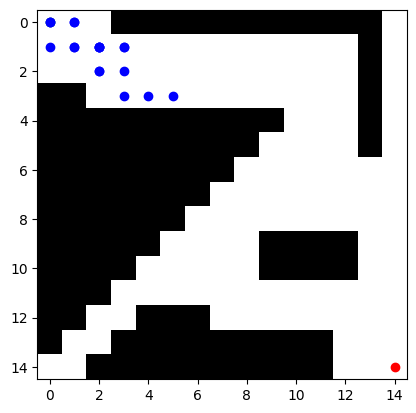

Generation 10:


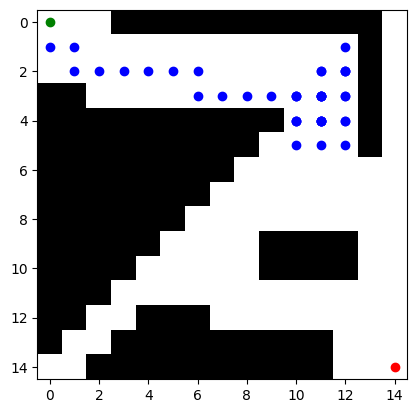

Generation 50:


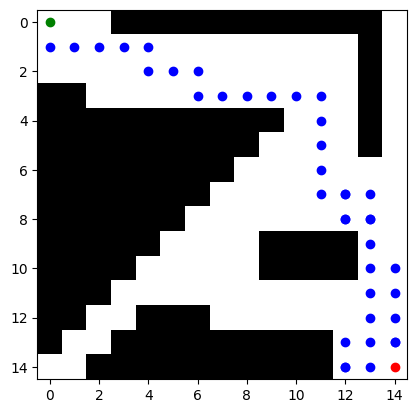

Generation 100:


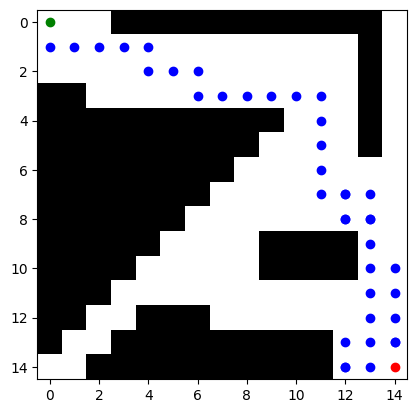

Generation 500:


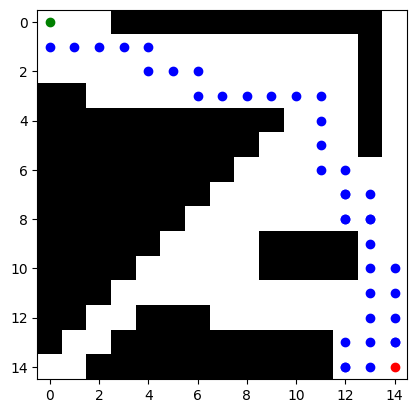

Generation 1999:


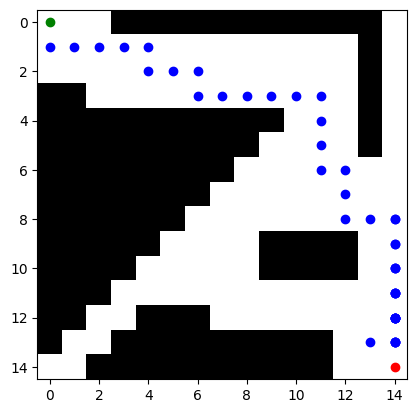

In [ ]:
run_ga()